# Imdb Movies' Data Initial EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

from helper import movies_by_genre

pd.set_option('display.max_columns', 100)

## The question

What factors make a movie financially successful? Is it a question of genre and/or actors and directors taking part in the movie or do the movie rating sites play a role in making a movie successful (or, as it has been said for example [here](http://www.hollywoodreporter.com/news/studios-fight-back-withering-rotten-tomatoes-scores-1025575), *unsuccessful*)?

## Initial Data Cleaning

We start by importing the dataset containing [data scraped from imdb](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset)

In [2]:
imdb = pd.read_csv('data/movie_metadata.csv')

In [3]:
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [5]:
imdb.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [6]:
imdb.describe(include=['O']).T

,count,unique,top,freq
color,5024,2,Color,4815
director_name,4939,2398,Steven Spielberg,26
actor_2_name,5030,3032,Morgan Freeman,20
genres,5043,914,Drama,236
actor_1_name,5036,2097,Robert De Niro,49
movie_title,5043,4917,King Kong,3
actor_3_name,5020,3521,John Heard,8
plot_keywords,4890,4760,based on novel,4
movie_imdb_link,5043,4919,http://www.imdb.com/title/tt3332064/?ref_=fn_t...,3
language,5031,47,English,4704


We have some cleaning to do:

1. Unique movies: we have repeated titles, some real duplicates and some not; so as in the exercises we have to identify the real duplicates using the movie_imdb_link and make the movie titles unique.
2. Currency: as it is pointed out in the [kaggle competition page](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset), there is a problem with currencies that we need to address somehow, for both the different currencies and the different value of a currency throughout the years.

We start by looking at duplicate movie titles:

In [7]:
imdb.drop_duplicates().describe(include=['O']).T

,count,unique,top,freq
color,4979,2,Color,4772
director_name,4895,2398,Steven Spielberg,26
actor_2_name,4985,3032,Morgan Freeman,20
genres,4998,914,Drama,235
actor_1_name,4991,2097,Robert De Niro,49
movie_title,4998,4917,Home,3
actor_3_name,4975,3521,Ben Mendelsohn,8
plot_keywords,4846,4760,based on novel,4
movie_imdb_link,4998,4919,http://www.imdb.com/title/tt2638144/?ref_=fn_t...,3
language,4986,47,English,4662


For example, the movie "King Kong" appears three time in the dataset:

In [8]:
imdb[imdb.movie_title.str.startswith('King Kong')]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
25,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Action|Adventure|Drama|Romance,Naomi Watts,King Kong,316018,7123,Evan Parke,0.0,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618.0,English,New Zealand,PG-13,207000000.0,2005.0,919.0,7.2,2.35,0
2049,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Action|Adventure|Drama|Romance,Naomi Watts,King Kong,316020,7122,Evan Parke,0.0,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618.0,English,New Zealand,PG-13,207000000.0,2005.0,918.0,7.2,2.35,0
4694,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Action|Adventure|Drama|Romance,Naomi Watts,King Kong,316027,7122,Evan Parke,0.0,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618.0,English,New Zealand,PG-13,207000000.0,2005.0,918.0,7.2,2.35,0


I have to use the startswith to find titles, so there is additional cleaning to do on this columns:

In [9]:
imdb.movie_title = imdb.movie_title.str.strip()

In [10]:
imdb[imdb.movie_title=='King Kong']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
25,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Action|Adventure|Drama|Romance,Naomi Watts,King Kong,316018,7123,Evan Parke,0.0,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618.0,English,New Zealand,PG-13,207000000.0,2005.0,919.0,7.2,2.35,0
2049,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Action|Adventure|Drama|Romance,Naomi Watts,King Kong,316020,7122,Evan Parke,0.0,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618.0,English,New Zealand,PG-13,207000000.0,2005.0,918.0,7.2,2.35,0
4694,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Action|Adventure|Drama|Romance,Naomi Watts,King Kong,316027,7122,Evan Parke,0.0,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618.0,English,New Zealand,PG-13,207000000.0,2005.0,918.0,7.2,2.35,0


The differences seems to be only in the number related to imdb rating and reviews, maybe because some of the movies were scraped more than once in a short period of time. The column containing the imdb link to the movie can be used as a unique identifier for the rows, and we keep the last entry in order to have the most recent numbers:

In [11]:
imdb.drop_duplicates(subset=['movie_imdb_link'], keep='last', inplace=True)

We still have some duplicate movie titles: these are not duplicates so we need to distinguish them somehow.

In [12]:
duplicate_titles = list(imdb.movie_title.value_counts()[imdb.movie_title.value_counts() > 1].index)

In [13]:
imdb[imdb.movie_title.isin(duplicate_titles)]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1002,Color,Andrew Niccol,298.0,125.0,487.0,201.0,Chandler Canterbury,430.0,26616999.0,Action|Adventure|Romance|Sci-Fi|Thriller,J.D. Evermore,The Host,92461,1300,Rachel Roberts,3.0,alien|alien creature|body snatching|desert|par...,http://www.imdb.com/title/tt1517260/?ref_=fn_t...,347.0,English,USA,PG-13,4.000000e+07,2013.0,329.0,5.9,2.35,43000
2702,Color,NaN,18.0,60.0,NaN,186.0,Nicole de Boer,443.0,NaN,Drama|Fantasy|Mystery|Sci-Fi,David Ogden Stiers,The Dead Zone,7122,981,Chris Bruno,1.0,psychic|psychic power|psychometry|spin off|sup...,http://www.imdb.com/title/tt0281432/?ref_=fn_t...,77.0,English,Canada,TV-14,NaN,NaN,319.0,7.5,NaN,576
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3130,Color,David Cronenberg,112.0,103.0,0.0,275.0,Herbert Lom,1000.0,NaN,Horror|Sci-Fi|Thriller,Tom Skerritt,The Dead Zone,44804,2013,Anthony Zerbe,0.0,car accident|coma|evil politician|psychic|vision,http://www.imdb.com/title/tt0085407/?ref_=fn_t...,182.0,English,USA,R,1.000000e+07,1983.0,278.0,7.2,1.85,0
3791,Color,Dennis Hopper,24.0,94.0,0.0,51.0,Don Gordon,311.0,NaN,Drama,Raymond Burr,Out of the Blue,1599,498,Jim Byrnes,1.0,explosion|hitchhiking|punk|trauma|truck driver,http://www.imdb.com/title/tt0081291/?ref_=fn_t...,27.0,English,Canada,R,2.200000e+06,1980.0,59.0,7.2,1.85,274
3840,Color,Robert Sarkies,43.0,100.0,0.0,3.0,Matthew Sunderland,109.0,728.0,Crime|Drama,William Kircher,Out of the Blue,2776,122,Paul Glover,0.0,true crime,http://www.imdb.com/title/tt0839938/?ref_=fn_t...,22.0,English,New Zealand,NaN,NaN,2006.0,10.0,7.3,1.85,285


Among the false duplicates we have some TV series, such as The Dead Zone, which is recognizable as a TV series because it has not a director name or revenues and budget or year. We will have to exclude all TV series from the analysis and maybe the absence of this columns can be used to detect them since the dataset lacks an indication of this.

But first we fix the titles by appending the year of the movie to distinguish them:

In [14]:
imdb.loc[imdb.movie_title.isin(duplicate_titles), 'movie_title'] = imdb.apply(lambda x: x.movie_title + ' (' + str(int(x.title_year)) + ')' if x.title_year == x.title_year else x.movie_title, axis=1)

Now, we turn our attention to the TV series by looking at all the rows without the director name:

In [15]:
no_director = imdb.loc[pd.isnull(imdb.director_name), ['movie_title', 'duration', 'gross', 'genres', 'plot_keywords', 'language', 'country', 'content_rating', 'budget', 'title_year']]

In [16]:
no_director.content_rating.unique()

array(['TV-14', 'TV-PG', 'TV-MA', 'TV-G', nan, 'TV-Y', 'TV-Y7', 'Not Rated'], dtype=object)

It seems that the ratings may help us to recognize TV related rows:

In [17]:
TV_ratings = ['TV-14', 'TV-PG', 'TV-MA', 'TV-G', 'TV-Y', 'TV-Y7']
TV_stuff = imdb.loc[imdb.content_rating.isin(TV_ratings), ['movie_title', 'duration', 'gross', 'genres', 'plot_keywords', 'language', 'country', 'content_rating', 'budget', 'title_year']]

In [18]:
print('Number of rows without director: {}'.format(len(no_director)))
print('Number of rows with TV rating: {}'.format(len(TV_stuff)))
print('Number of rows without director or with TV rating: {}'.format(len(set(TV_stuff.movie_title) | set(no_director.movie_title))))
print('Number of rows without director and with TV rating: {}'.format(len(set(TV_stuff.movie_title) & set(no_director.movie_title))))

Number of rows without director: 102
Number of rows with TV rating: 73
Number of rows without director or with TV rating: 112
Number of rows without director and with TV rating: 63


We have some differences between the sets; the rows with TV rating and director seem to be TV movies:

In [19]:
tv_dir = set(TV_stuff.movie_title) - set(no_director.movie_title)
tv_dir

{'A Charlie Brown Christmas',
 'Christmas Mail',
 'High School Musical',
 'High School Musical 2',
 'How to Fall in Love',
 'Lies in Plain Sight',
 'Sharknado',
 'Space Battleship Yamato',
 'The Ridiculous 6',
 'We Have Your Husband'}

Instead, the rows without the director but with non-TV rating contains TV shows and series:

In [20]:
no_dir_no_tv = set(no_director.movie_title) - set(TV_stuff.movie_title)
no_dir_no_tv

{'A Touch of Frost',
 'Anger Management',
 'Animal Kingdom',
 'BrainDead',
 'Carlos',
 'Creature',
 'Deadline Gallipoli',
 'Emma',
 'Fired Up',
 'Get Real',
 'Ghost Hunters',
 'Hit the Floor',
 'In the Heat of the Night',
 'Jesse',
 'Life',
 'Lovesick',
 'Meet the Browns',
 'Nikita',
 'Rogue',
 'Secrets and Lies',
 'Space: Above and Beyond',
 'The Bachelor',
 'The Border',
 'The Company',
 'The Doombolt Chase',
 'The Grand',
 'The Honeymooners',
 'The Messengers',
 'The Missing',
 'The Secret',
 'The Streets of San Francisco',
 'Trapped',
 'Twisted',
 'Unforgettable',
 'Unforgotten',
 'Wings',
 'Wolf Creek',
 'Wuthering Heights',
 'Yu-Gi-Oh! Duel Monsters'}

For the first set the gross revenues are always missing:

In [21]:
imdb[imdb.movie_title.isin(tv_dir)].gross

821    NaN
3012   NaN
3543   NaN
3811   NaN
3880   NaN
3965   NaN
4005   NaN
4209   NaN
4243   NaN
4937   NaN
Name: gross, dtype: float64

For the second, the ratings aren't meaningful:

In [22]:
imdb[imdb.movie_title.isin(no_dir_no_tv)].content_rating.unique()

array([nan, 'Not Rated'], dtype=object)

Moreover, there is only one movie in the second set for which the gross revenue is not missing, but it lacks some other important variables such as the budget:

In [23]:
imdb[(imdb.movie_title.isin(no_dir_no_tv)) & (~pd.isnull(imdb.gross))]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2466,Color,NaN,108.0,334.0,NaN,30.0,Nora von Waldstätten,897.0,145118.0,Biography|Crime|Drama|Thriller,Edgar Ramírez,Carlos,10111,1032,Katharina Schüttler,0.0,opec|pubic hair|revolutionary|terrorism|true c...,http://www.imdb.com/title/tt1321865/?ref_=fn_t...,36.0,English,France,Not Rated,NaN,NaN,30.0,7.7,2.35,0


Since we do not want TV series and we are interested in analysing the gross revenues, I'm going to drop all rows for which the director is missing or the rating content code starts with TV.

In [24]:
imdb = imdb[~imdb.movie_title.isin(set(TV_stuff.movie_title) | set(no_director.movie_title))]

Before going on we have some more rows to possibly drop: as we can see we have documentaries and shorts in the dataset:

In [25]:
imdb[imdb.genres.str.contains('Documentary')]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
504,Color,Jacques Perrin,113.0,104.0,63.0,7.0,Jacques Perrin,67.0,19406406.0,Documentary|Drama,Pedro Armendáriz Jr.,Oceans,7630,152,Rie Miyazawa,0.0,damselfish|ocean habitat|ocean life|razorfish|...,http://www.imdb.com/title/tt0765128/?ref_=fn_t...,42.0,French,France,G,40000000.0,2009.0,63.0,7.8,2.35,0
741,Color,Kenny Ortega,136.0,111.0,197.0,6.0,Mekia Cox,433.0,71844424.0,Documentary|Music,Misha Gabriel Hamilton,This Is It,33158,679,Judith Hill,0.0,2000s|box office hit|comeback|rehearsal|year 2009,http://www.imdb.com/title/tt1477715/?ref_=fn_t...,223.0,English,USA,PG,60000000.0,2009.0,208.0,7.3,1.78,0
1782,Color,Jacques Perrin,100.0,81.0,63.0,NaN,Philippe Labro,63.0,10762178.0,Documentary,Jacques Perrin,Winged Migration,10369,66,NaN,0.0,arctic|bad weather|flight|migration|ocean,http://www.imdb.com/title/tt0301727/?ref_=fn_t...,153.0,English,France,G,160000000.0,2001.0,3.0,8.0,1.85,1000
2160,Color,Jeff Tremaine,156.0,101.0,79.0,218.0,Steve-O,608.0,117224271.0,Action|Comedy|Documentary,Bam Margera,Jackass 3D,47794,1787,Chris Pontius,1.0,full frontal male nudity|man wearing a jock st...,http://www.imdb.com/title/tt1116184/?ref_=fn_t...,81.0,English,USA,R,20000000.0,2010.0,362.0,7.1,1.78,0
2265,Color,Michael Moore,222.0,105.0,909.0,173.0,Michael Moore,1000.0,14359793.0,Crime|Documentary|News,Ronald Reagan,Capitalism: A Love Story,35137,2327,Bernie Sanders,0.0,capitalism|critique of capitalism|investment b...,http://www.imdb.com/title/tt1232207/?ref_=fn_t...,188.0,English,USA,R,NaN,2009.0,909.0,7.4,1.85,10000
2686,Color,Catherine Owens,68.0,85.0,0.0,44.0,The Edge,468.0,10353690.0,Documentary|Music,Bono,U2 3D,2673,646,Larry Mullen Jr.,0.0,3d in title|digit in title|rock band|rocker|u2,http://www.imdb.com/title/tt0892375/?ref_=fn_t...,31.0,English,USA,G,NaN,2007.0,67.0,8.4,1.78,116
2834,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,Usher Raymond,Justin Bieber: Never Say Never,74351,714,Boys II Men,1.0,boyhood friend|manager|plasma tv|prodigy|star,http://www.imdb.com/title/tt1702443/?ref_=fn_t...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000
2946,Color,Dan Cutforth,68.0,93.0,4.0,8.0,Ashley Ashida Dixon,28.0,25240988.0,Documentary|Music,Lexie Contursi,Katy Perry: Part of Me,12383,52,Anthony Burrell,0.0,female protagonist|reference to britney spears...,http://www.imdb.com/title/tt2215719/?ref_=fn_t...,50.0,English,USA,PG,12000000.0,2012.0,9.0,5.9,1.85,0
3030,Color,Jeff Tremaine,104.0,92.0,79.0,218.0,Steve-O,608.0,72755517.0,Action|Comedy|Documentary,Bam Margera,Jackass Number Two,56595,1853,Chris Pontius,0.0,blindfold|male frontal nudity|male rear nudity...,http://www.imdb.com/title/tt0493430/?ref_=fn_t...,196.0,English,USA,R,NaN,2006.0,362.0,7.1,1.85,641


A short is ["an original motion picture that has a running time of 40 minutes or less, including all credits"](https://en.wikipedia.org/wiki/Short_film):

In [26]:
imdb[imdb.duration <= 40]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
279,NaN,Christopher Barnard,NaN,22.0,0.0,NaN,NaN,5.0,NaN,Comedy,Mathew Buck,"10,000 B.C.",6,5,NaN,0.0,NaN,http://www.imdb.com/title/tt1869849/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,NaN,0
2345,Color,Jane Clark,NaN,7.0,23.0,51.0,Traci Dinwiddie,344.0,NaN,Romance|Short,Necar Zadegan,The Touch,118,726,Elea Oberon,0.0,lesbian|paris france|period piece|poem|poetess,http://www.imdb.com/title/tt1128219/?ref_=fn_t...,NaN,English,USA,NaN,13000.0,2007.0,281.0,5.2,1.85,30
4003,Color,Sam Raimi,252.0,37.0,0.0,199.0,Dan Hicks,634.0,5923044.0,Comedy|Fantasy|Horror|Thriller,Ted Raimi,Evil Dead II,113451,1347,Kassie Wesley DePaiva,0.0,cabin|cabin in the woods|demon|evil dead|woods,http://www.imdb.com/title/tt0092991/?ref_=fn_t...,537.0,English,USA,X,3600000.0,1987.0,328.0,7.8,1.85,0
4198,Color,Randall Miller,1.0,34.0,19.0,362.0,Elden Henson,882.0,333658.0,Comedy|Family|Musical|Romance|Short,William Hurt,Marilyn Hotchkiss' Ballroom Dancing and Charm ...,97,1967,Michael Bower,0.0,student film|wonder years,http://www.imdb.com/title/tt0283465/?ref_=fn_t...,2.0,English,USA,NaN,34000.0,1990.0,577.0,7.1,NaN,16
4439,Color,Robert Greenwald,56.0,20.0,21.0,0.0,Jon Hunter,0.0,NaN,Documentary,Lee Scott,Wal-Mart: The High Cost of Low Price,4120,0,Matt Hunter,0.0,greed|pollution|slave labor|truth|wal mart,http://www.imdb.com/title/tt0473107/?ref_=fn_t...,70.0,English,USA,Not Rated,1500000.0,2005.0,0.0,6.8,1.85,0
4673,Color,Clark Baker,1.0,14.0,0.0,37.0,Alan Pietruszewski,134.0,NaN,Horror|Sci-Fi|Short|Thriller,Taylor Pigeon,Vessel,292,315,Whit Spurgeon,1.0,alien|flight attendant|monster|pilot|tentacle,http://www.imdb.com/title/tt2164708/?ref_=fn_t...,3.0,English,USA,NaN,NaN,2012.0,93.0,6.2,NaN,14
4878,Color,Jason Naumann,NaN,35.0,2.0,152.0,Kate Flannery,338.0,NaN,Comedy|Short,Victoria Jackson,Jesus People,31,968,Tim Bagley,5.0,mockumentary|single camera|subtle comedy,http://www.imdb.com/title/tt1003002/?ref_=fn_t...,NaN,English,USA,NaN,NaN,2007.0,219.0,6.9,NaN,0


We are going to drop the shorts because, even if they have a budget, they are a production of their own and we're interested on feature-length movies; instead I will keep the documentaries because there is some pretty popular movies among them, such as Michael Moore movies, documentaries about rockstars and such.

In [27]:
imdb = imdb[imdb.duration > 40]

We have more than 700 movies without a gross revenue, since this is our main variable of interest mainly we'll have to drop them, but first let's see what kind of movies this are by year and country:

In [28]:
imdb[['gross', 'budget']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4787 entries, 0 to 5042
Data columns (total 2 columns):
gross     4050 non-null float64
budget    4409 non-null float64
dtypes: float64(2)
memory usage: 112.2 KB


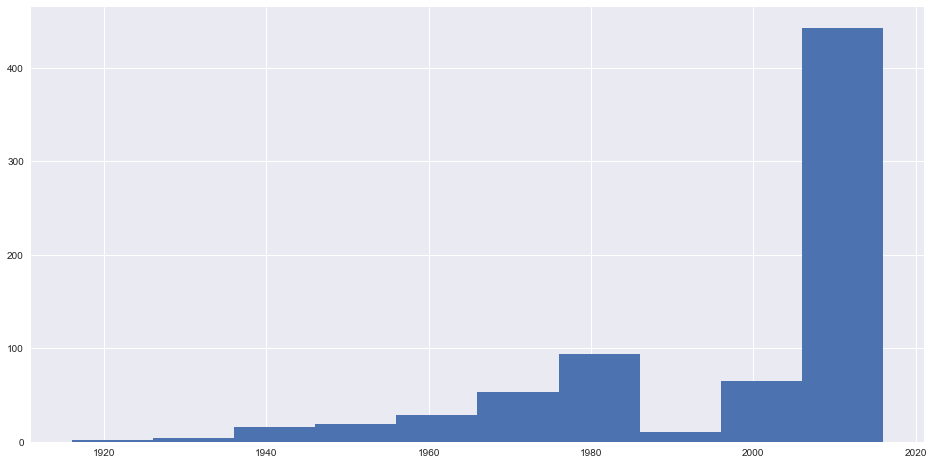

In [29]:
imdb[pd.isnull(imdb.gross)].title_year.hist(figsize=(16, 8));

We have some old movies, as expected, and a high peak for recent years which may be explained because data is not yet arrived for this movies (this dataset on kaggle is dated one year ago, so it can contain movies recently released back then or yet to be released in the year).

The recent movies seems to contain also TV series among them, for which we have a budget but not a gross revenue. I guess there may also be TV movies or similar things, for which revenues may not be registered as for cinema movies.

In [30]:
imdb[(pd.isnull(imdb.gross)) & (imdb.title_year == 2016)]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,Mark Chinnery,Godzilla Resurgence,374,699,Atsuko Maeda,0.0,blood|godzilla|monster|sequel,http://www.imdb.com/title/tt4262980/?ref_=fn_t...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
810,Color,Pou-Soi Cheang,14.0,119.0,3.0,22.0,Aaron Kwok,879.0,NaN,Action|Adventure|Fantasy,Li Gong,Xi you ji zhi: Sun Wukong san da Baigu Jing,1212,1026,Eddie Peng,1.0,buddhism|demon|journey to the west|monk|monkey...,http://www.imdb.com/title/tt4591310/?ref_=fn_t...,9.0,English,China,NaN,68005000.0,2016.0,107.0,6.0,2.35,426
1733,Color,Greg Tiernan,65.0,89.0,5.0,365.0,Salma Hayek,11000.0,NaN,Adventure|Animation|Comedy|Fantasy,James Franco,Sausage Party,3302,15795,Anders Holm,0.0,bread|coarse language|f word|sausage|tricked i...,http://www.imdb.com/title/tt1700841/?ref_=fn_t...,14.0,English,USA,R,19000000.0,2016.0,4000.0,7.5,1.85,13000
1752,Color,Stephen Frears,87.0,110.0,350.0,83.0,Nina Arianda,11000.0,NaN,Biography|Comedy|Drama|Music|Romance,Meryl Streep,Florence Foster Jenkins,2167,11534,John Sessions,3.0,heiress|opera singer|platonic marriage|singer|...,http://www.imdb.com/title/tt4136084/?ref_=fn_t...,32.0,English,UK,PG-13,29000000.0,2016.0,183.0,7.1,2.35,0
2351,Color,Jonathan Jakubowicz,NaN,105.0,23.0,897.0,Jurnee Smollett-Bell,22000.0,NaN,Action|Biography|Drama|Sport,Robert De Niro,Hands of Stone,178,27425,Edgar Ramírez,0.0,boxer|boxing|three word title,http://www.imdb.com/title/tt1781827/?ref_=fn_t...,1.0,English,Panama,R,20000000.0,2016.0,2000.0,7.2,NaN,0
2366,Color,Rob Hawk,6.0,90.0,97.0,319.0,Erin O'Brien,731.0,NaN,Action|Drama,Kari J. Kramer,Fight Valley,60,2374,Cabrina Collesides,4.0,NaN,http://www.imdb.com/title/tt4280822/?ref_=fn_t...,6.0,English,USA,NaN,27000000.0,2016.0,634.0,5.0,NaN,1000
2461,Color,Zack Ward,15.0,92.0,662.0,161.0,Anna Harr,662.0,NaN,Horror,Zack Ward,Restoration,436,1498,James Cullen Bressack,0.0,NaN,http://www.imdb.com/title/tt4517738/?ref_=fn_t...,6.0,English,USA,NaN,NaN,2016.0,290.0,4.0,NaN,378
2470,Color,Chuck Russell,23.0,92.0,55.0,757.0,Rebecca De Mornay,1000.0,NaN,Action|Crime|Drama|Thriller,Sam Trammell,I Am Wrath,4510,3212,Amanda Schull,1.0,conspiracy|female scientist|mugging|police det...,http://www.imdb.com/title/tt3212232/?ref_=fn_t...,50.0,English,USA,R,18000000.0,2016.0,872.0,5.2,NaN,0
3090,Color,Shintaro Shimosawa,38.0,106.0,29.0,571.0,Anthony Hopkins,14000.0,NaN,Drama|Thriller,Al Pacino,Misconduct,6935,27660,Glen Powell,3.0,black panties|lust|sexual attraction|voyeur|vo...,http://www.imdb.com/title/tt3658772/?ref_=fn_t...,50.0,English,USA,R,11000000.0,2016.0,12000.0,5.3,2.35,0
3129,Color,David Lowery,78.0,102.0,38.0,190.0,Oona Laurence,3000.0,NaN,Adventure|Family|Fantasy,Bryce Dallas Howard,Pete's Dragon,408,3691,Isiah Whitlock Jr.,0.0,NaN,http://www.imdb.com/title/tt2788732/?ref_=fn_t...,6.0,English,USA,PG,65000000.0,2016.0,424.0,7.3,2.35,21000


We can drop all the rows for which the gross revenue is missing; we have still some movies for which there is the gross but not the budget, we will keep them for now.

In [31]:
imdb = imdb[~pd.isnull(imdb.gross)]

In [32]:
imdb[['gross', 'budget']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4050 entries, 0 to 5042
Data columns (total 2 columns):
gross     4050 non-null float64
budget    3787 non-null float64
dtypes: float64(2)
memory usage: 94.9 KB


Finally, we can take a look at the distribution of movies througout the years:

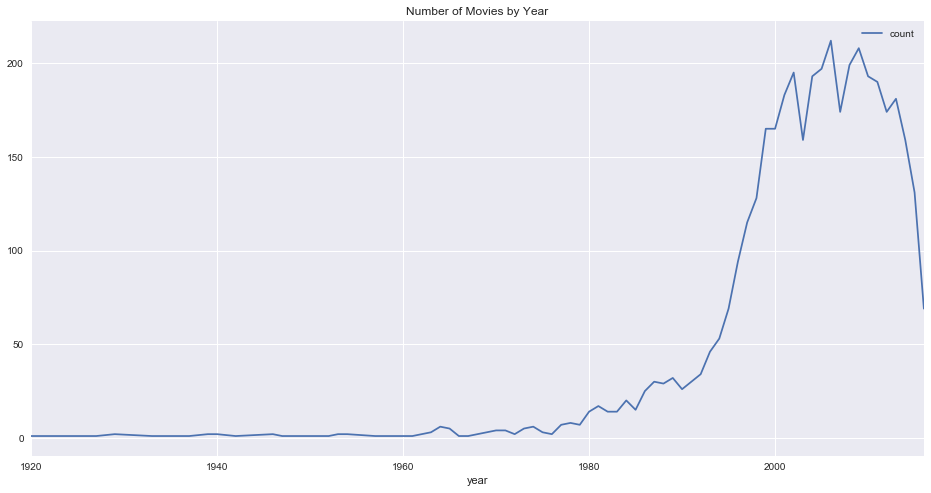

In [33]:
imdb.title_year.value_counts().reset_index()\
    .sort_values(by='index').rename(columns={'index':'year', 'title_year':'count'})\
    .plot(x='year', y='count', figsize=(16, 8), grid='on', title='Number of Movies by Year');

plt.savefig('figures/movies_by_year.png');

## Adding the ROI column

To avoid the different currencies and currency value throughout the years I want to compare gross revenues to budget in percentage, so I'm going to use the [ROI](https://en.wikipedia.org/wiki/Return_on_investment) as a measure of the financial success of a movie:

In [34]:
imdb['ROI'] = (imdb.gross - imdb.budget) / imdb.budget

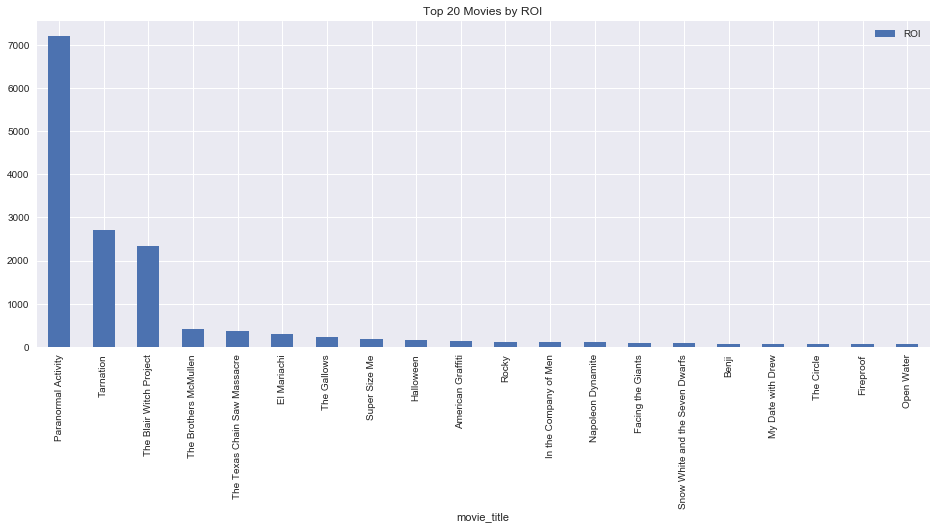

In [35]:
imdb.sort_values(by='ROI', ascending=False).head(20).plot(kind='bar',
                                                            x='movie_title',
                                                            y='ROI',
                                                            figsize=(16, 6),
                                                            title='Top 20 Movies by ROI');

plt.savefig('figures/top20_movies_by_roi.png')

In [36]:
imdb.ROI.describe()

count    3787.000000
mean        5.177534
std       131.209670
min        -0.999982
25%        -0.555569
50%         0.065064
75%         1.224405
max      7193.485533
Name: ROI, dtype: float64

Interestingly, more than 25% of the movies for which we can calculate the ROI are losing money, and half the movies are gaining less than the 10% of what they spent.

As you can see, the distribution is very skewed, so it could be beneficial to take the log (in this case I will take the log of the ROI plus 1 to avoid negative values).

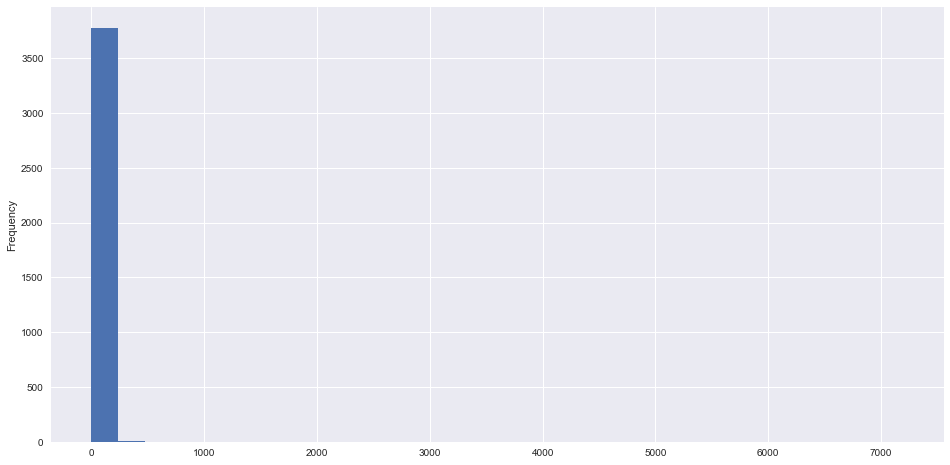

In [37]:
imdb.ROI.plot.hist(figsize=(16, 8), bins=30);

In [38]:
imdb['log_ROI'] = imdb.ROI.apply(lambda x: np.log10(x + 1))

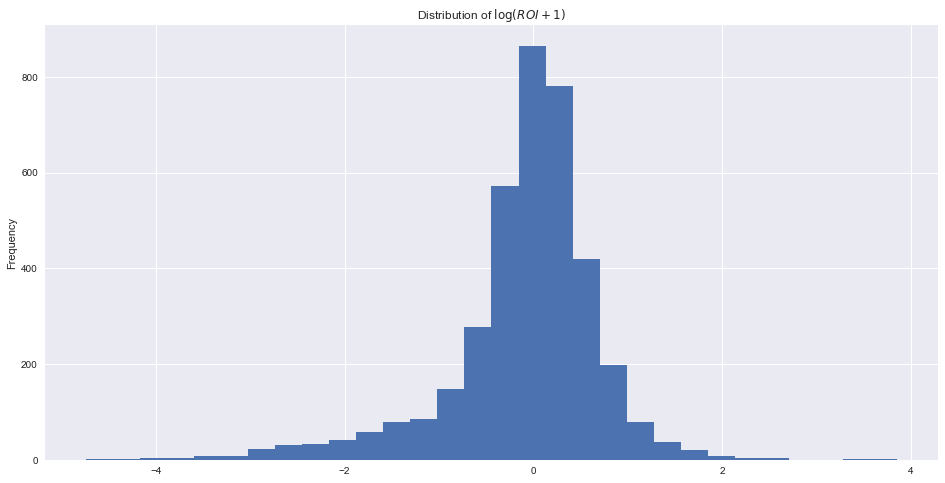

In [39]:
imdb.log_ROI.plot.hist(figsize=(16, 8), bins=30, title='Distribution of $\log(ROI + 1)$');

plt.savefig('figures/log_roi_distribution.png')

Now we can analyze how the ROI relates with the columns containing imdb ratings' data:

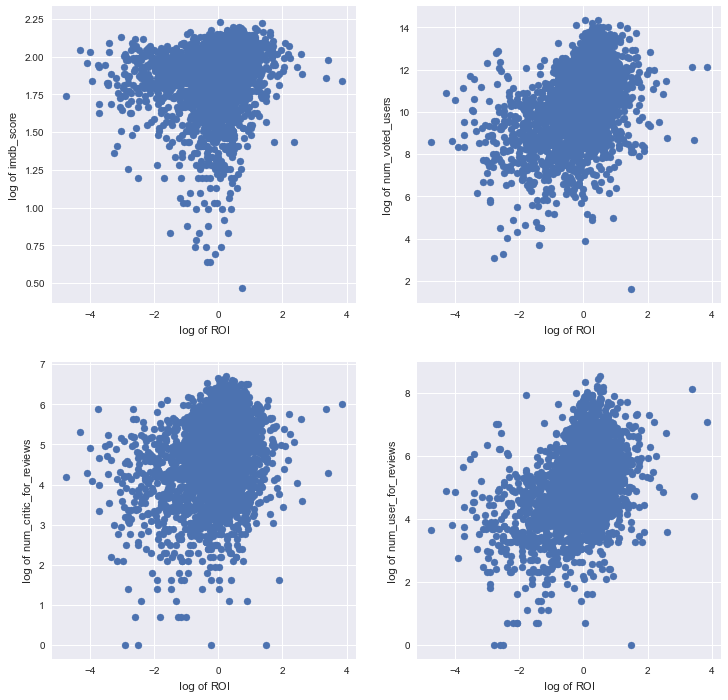

In [40]:
imdb_cols = ['imdb_score', 'num_voted_users', 'num_critic_for_reviews', 'num_user_for_reviews']

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

i = 0
j = 0
for col in imdb_cols:
    ax[i, j].scatter(imdb.log_ROI, np.log(imdb[col]))
    ax[i, j].set_xlabel('$\log$ of ROI')
    ax[i, j].set_ylabel('$\log$ of {}'.format(col))
    j += 1
    if j == 2:
        i += 1
        j = 0

fig.savefig('figures/roi_vs_imdb.png') ;

# for col in imdb_cols[0:1]:
#     g = sns.jointplot(x='log_ROI', y=col, data=imdb)
#     g.fig.suptitle('ROI vs {}'.format(col))
#     if col != 'imdb_score':
#         ax = g.ax_joint
#         ax.set_yscale('log')
#         g.ax_marg_y.set_yscale('log')

In [41]:
imdb[imdb_cols + ['ROI']].corr().loc['ROI', imdb_cols]

imdb_score                0.008753
num_voted_users           0.010649
num_critic_for_reviews    0.033154
num_user_for_reviews      0.068726
Name: ROI, dtype: float64

As we can see from the scatter plots and the correlation matrix, the ratings on imdb do not seem to be very correlated with the ROI.

## Adding the genre columns

Finally, we clean the genres column, which has genres divided by pipes; first we need a dictionary of all the genres present in the dataset:

In [42]:
genres = set([])

for value in imdb.genres:
    curr = set(value.split('|'))
    genres = genres | curr

genres = list(genres)

Then we add a column for each genre with the indication of whether the movie has that genre and we save this file as a pickle for future re-use:

In [43]:
for genre in genres:
    imdb[genre] = imdb.genres.str.contains(genre).astype('int')

In [44]:
imdb.to_pickle('pickle/imdb_cleaned.p')

We can see how the number of movies by genre varies in the years:

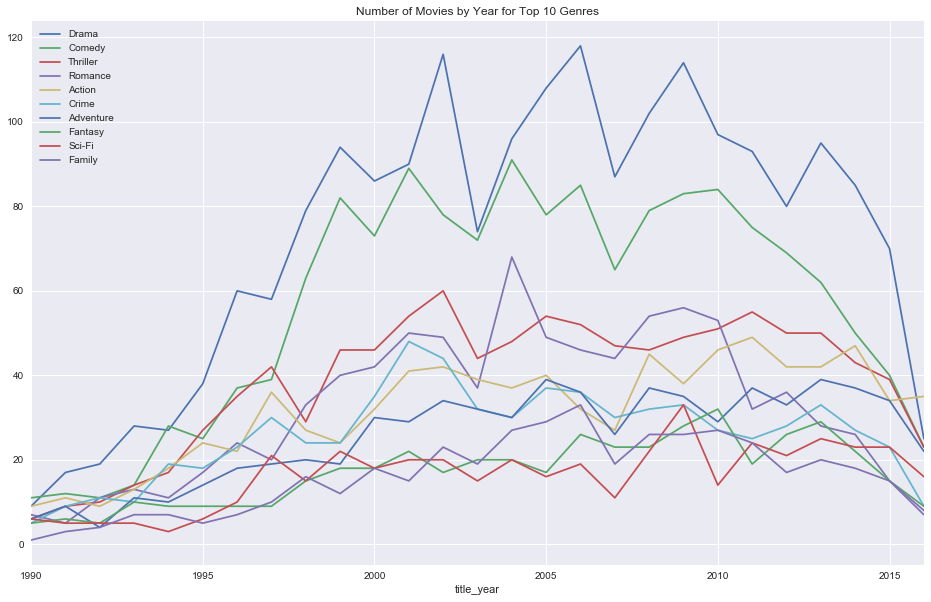

In [45]:
top10_genres = imdb.loc[imdb.title_year >= 1990,
                        ['Biography', 'Adventure', 'Family', 'War', 'Sci-Fi', 'Mystery', 'Romance',
                         'Crime', 'Action', 'Animation', 'Sport', 'Drama', 'Documentary', 'Music',
                         'History', 'Fantasy', 'Film-Noir', 'Thriller', 'Horror', 'Short', 'Comedy',
                         'Western', 'News', 'Musical']].sum().sort_values(ascending=False).head(10).index.values

ax = imdb.loc[imdb.title_year >= 1990].groupby('title_year').sum()[top10_genres].reset_index().plot(x='title_year', y=top10_genres, figsize=(16, 10));
ax.set_title('Number of Movies by Year for Top 10 Genres')

plt.savefig('figures/movies_by_year_genre.png');

and if there are significant differences in the ROI across the top genres:

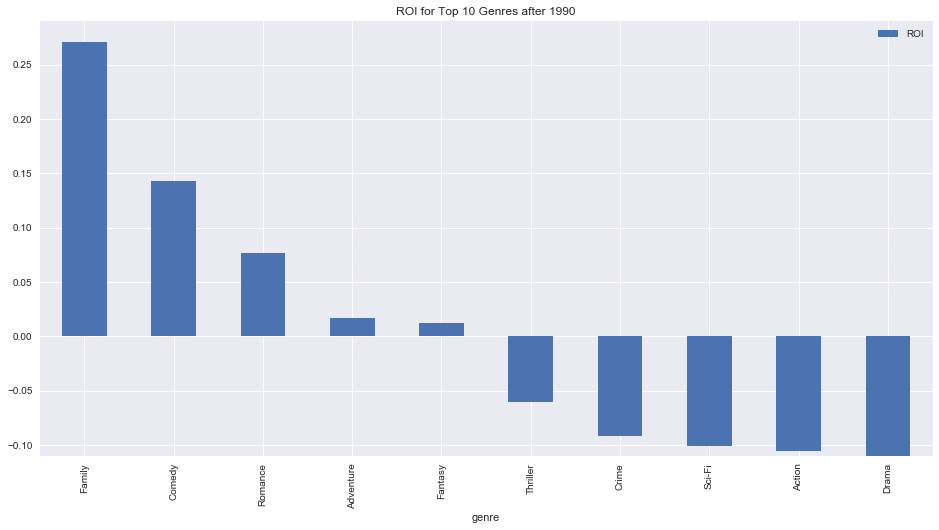

In [46]:
top_genres_ROI = movies_by_genre(imdb[imdb.title_year >= 1990])
# top_genres_ROI = top_genres_ROI[top_genres_ROI.genre.isin(top10_genres)].\
#                     groupby('genre').\
#                     apply(lambda x: pd.Series(
#                         {'ROI': (x.gross.sum() - x.budget.sum()) / (x.budget.sum()) if x.budget.sum() != 0 else np.NaN})
#                          ).\
#                     sort_values(by='ROI', ascending=False)
# using median instead
top_genres_ROI = top_genres_ROI[top_genres_ROI.genre.isin(top10_genres)].\
                    groupby('genre').\
                    apply(lambda x: pd.Series(
                        {'ROI': x.ROI.median()})
                         ).\
                    sort_values(by='ROI', ascending=False)

ax = top_genres_ROI.plot.bar(figsize=(16, 8));
ax.set_title('ROI for Top 10 Genres after 1990')

plt.savefig('figures/top_genres_roi_median.png');

Looking at movies produced after 1990 for the top 10 genres, family and romance genres seem to perform better than the other ones in terms of ROI.